## 16.5 Zero Inflated Poisson Regression Example 

As we discussed in section 14.3.4, often we are faced with a distribution which is looks like a Poisson distribution but has an inflated zero count. In this situation Poisson Regression would not be suitable however we can fit a Zero Inflated Poisson Regression, unfortunately the glm() function is incapable of this modelling approach so we need different package called pscl.

Below we simulate data using a similar example to section 14.5.1 but instead of hospital admissions count we are interested in number of alcoholic drinks drunk in a day (treatment and country remain the same). The count for alcoholic drinks has a large number of zeros and thus is suitable to model with a Zero Inflated Poisson Regression.


In [15]:
#Install package
#install.packages("VGAM")
#install.packages("pscl")
library("VGAM")
library(pscl)

#Number of data points to simulate
n=100
#Shape
lambda=3
#Probability of drawing a zero
p=0.5
#Create data
alcohol_count<-rzipois(n, lambda = lambda, pstr0 = p)
country <-  factor(sample(1:4, n, replace=T), levels=1:4, labels=c("England","Northern Ireland","Scotland","Wales"))
treatment <- factor(gl(2,n/2), levels=1:2, labels=c("Placebo Arm","Active Arm"))
print(df <- data.frame(treatment, country, alcohol_count))
summary(df)
summary(m1 <- zeroinfl(alcohol_count ~ country + treatment, data = df))

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


      treatment          country alcohol_count
1   Placebo Arm          England             4
2   Placebo Arm            Wales             0
3   Placebo Arm Northern Ireland             4
4   Placebo Arm            Wales             0
5   Placebo Arm          England             0
6   Placebo Arm          England             0
7   Placebo Arm Northern Ireland             6
8   Placebo Arm         Scotland             0
9   Placebo Arm          England             0
10  Placebo Arm Northern Ireland             0
11  Placebo Arm Northern Ireland             1
12  Placebo Arm Northern Ireland             2
13  Placebo Arm Northern Ireland             0
14  Placebo Arm            Wales             0
15  Placebo Arm         Scotland             0
16  Placebo Arm Northern Ireland             4
17  Placebo Arm         Scotland             1
18  Placebo Arm Northern Ireland             0
19  Placebo Arm          England             1
20  Placebo Arm          England             4
21  Placebo A

       treatment              country   alcohol_count 
 Placebo Arm:50   England         :26   Min.   :0.00  
 Active Arm :50   Northern Ireland:34   1st Qu.:0.00  
                  Scotland        :26   Median :0.00  
                  Wales           :14   Mean   :1.14  
                                        3rd Qu.:2.00  
                                        Max.   :8.00  


Call:
zeroinfl(formula = alcohol_count ~ country + treatment, data = df)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.7880 -0.7227 -0.4582  0.4130  4.6787 

Count model coefficients (poisson with log link):
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.03937    0.24093   4.314  1.6e-05 ***
countryNorthern Ireland  0.12880    0.24890   0.517    0.605    
countryScotland         -0.40356    0.37120  -1.087    0.277    
countryWales             0.08974    0.39442   0.228    0.820    
treatmentActive Arm      0.09866    0.22040   0.448    0.654    

Zero-inflation model coefficients (binomial with logit link):
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)               0.1425     0.4828   0.295    0.768
countryNorthern Ireland  -0.1511     0.5520  -0.274    0.784
countryScotland           0.7827     0.6597   1.186    0.235
countryWales              1.0468     0.7850   1.333    0.182
treatmentActive

The model fits a glm with a binomial logit link to predict the excess zeros and a glm with a Possion log link to model the rest of the distribution. In both models the variables (country and treatment) have been included however you could use different variables in the two models. Unfortunately the models do not combine the estimates from each model however we can use the coefficients to make predictions.

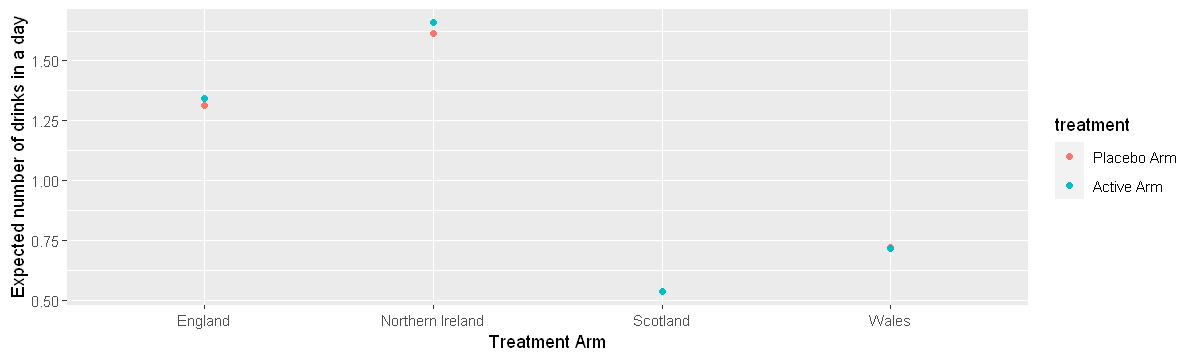

In [16]:
df$pred <- predict(m1, type="response")
# Create the plot
ggplot(df, aes(x = country, y = pred, colour = treatment)) +
  geom_point(aes(y = pred)) +
  labs(x = "Treatment Arm", y = "Expected number of drinks in a day")

The graph shows the expected number of drinks in a day for each country and treatment group, from this we would expect the most number of drinks to be drunk in a day to be for people in the Placebo arm living in Wales, with the fewest from the Active arm people living in Northern Ireland.


### 16.5.1 Vuong test (Optional Reading)

To check if the zero inflated Poisson regression models the data better than the straight forward  Poisson regression we can run a Vuong test. A Vuong test is a likelihood ratio test used for model selection when the models are nested, non-nested or overlapping. The null hypothesis is that the two models supplied are equally close to the true data generation structure, against the alternative that one model is closer. To run a Vuong test in R we simple use the vuong() function and supply the two models we wish to compare in our case it is the zero inflated Poisson verses the Poisson model.


In [17]:
#Zero inflated model
summary(m1 <- zeroinfl(alcohol_count ~ treatment + country , data = df))
#Poisson regression
summary(m2 <- glm(alcohol_count ~ treatment + country, family="poisson", data=df))
#Vuong test
vuong(m1, m2)


Call:
zeroinfl(formula = alcohol_count ~ treatment + country, data = df)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.7880 -0.7227 -0.4582  0.4130  4.6787 

Count model coefficients (poisson with log link):
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.03937    0.24093   4.314  1.6e-05 ***
treatmentActive Arm      0.09866    0.22040   0.448    0.654    
countryNorthern Ireland  0.12880    0.24890   0.517    0.605    
countryScotland         -0.40356    0.37120  -1.087    0.277    
countryWales             0.08974    0.39442   0.228    0.820    

Zero-inflation model coefficients (binomial with logit link):
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)               0.1425     0.4828   0.295    0.768
treatmentActive Arm       0.1377     0.4545   0.303    0.762
countryNorthern Ireland  -0.1511     0.5520  -0.274    0.784
countryScotland           0.7827     0.6597   1.186    0.235
countryWales   


Call:
glm(formula = alcohol_count ~ treatment + country, family = "poisson", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8081  -1.6505  -1.0453   0.5542   4.2552  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)   
(Intercept)              0.30905    0.19307   1.601  0.10945   
treatmentActive Arm     -0.02373    0.18885  -0.126  0.90000   
countryNorthern Ireland  0.18233    0.21651   0.842  0.39972   
countryScotland         -0.91355    0.31698  -2.882  0.00395 **
countryWales            -0.63542    0.35882  -1.771  0.07658 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 270.46  on 99  degrees of freedom
Residual deviance: 250.66  on 95  degrees of freedom
AIC: 364.19

Number of Fisher Scoring iterations: 6


Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A    p-value
Raw                    4.474813 model1 > model2 3.8239e-06
AIC-corrected          3.998462 model1 > model2 3.1878e-05
BIC-corrected          3.377975 model1 > model2 0.00036511


The output shows three z-statistics, the raw, the AIC-corrected and the BIC-corrected. In brief, the AIC (Akaike information criterion) and BIC (Bayesian information criterion) introduce a penalty term to reduce the likelihood of overfitting. When adding parameters to models it is possible to increase the likelihood, the penalty term adjusts for this increase; the penalty term is larger in BIC than in the AIC.

We can see in the output that for all three p values there is significantly strong evidence that model 1, the zero inflated Poisson regression fits the data far better than model 2 the Poisson regression. If however the p values did not agree then the data scientist would have to think about the affects of each method and decide if the raw, AIC or BIC would be the most appropriate in the setting being looked at. There is a debate about the use of Vuong test for this type of comparison, if you wish to read more there is a good paper which can be found here (https://www.sciencedirect.com/science/article/abs/pii/S016517651400490X).
